In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import graphviz
from sklearn import preprocessing 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
import pydotplus
from IPython.display import Image

In [2]:
url="https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

# Data Encoding and Preprocessing

In [7]:
df["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [8]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [11]:
df["seller_type"]=preprocessing.LabelEncoder().fit_transform(df["seller_type"])
df["owner"]=preprocessing.LabelEncoder().fit_transform(df["owner"])
df["fuel"]=preprocessing.LabelEncoder().fit_transform(df["fuel"])
df["transmission"]=preprocessing.LabelEncoder().fit_transform(df["transmission"])

In [12]:
df.head()

name  year  selling_price  km_driven  fuel  \
0             Maruti 800 AC  2007          60000      70000     4   
1  Maruti Wagon R LXI Minor  2007         135000      50000     4   
2      Hyundai Verna 1.6 SX  2012         600000     100000     1   
3    Datsun RediGO T Option  2017         250000      46000     4   
4     Honda Amaze VX i-DTEC  2014         450000     141000     1   

   seller_type  transmission  owner  
0            1             1      0  
1            1             1      0  
2            1             1      0  
3            1             1      0  
4            1             1      2

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


In [14]:
no_of_years=abs(df["year"]-2023)

In [15]:
df.insert(df.columns.get_loc("year")+2,"no_of_years",no_of_years)

In [16]:
df.head()

name  year  selling_price  no_of_years  km_driven  \
0             Maruti 800 AC  2007          60000           16      70000   
1  Maruti Wagon R LXI Minor  2007         135000           16      50000   
2      Hyundai Verna 1.6 SX  2012         600000           11     100000   
3    Datsun RediGO T Option  2017         250000            6      46000   
4     Honda Amaze VX i-DTEC  2014         450000            9     141000   

   fuel  seller_type  transmission  owner  
0     4            1             1      0  
1     4            1             1      0  
2     1            1             1      0  
3     4            1             1      0  
4     1            1             1      2

In [17]:
df.drop(["name","year"],axis=1,inplace=True)
df.rename(columns={"selling_price":"current_selling_price"},inplace=True)

In [18]:
df.head()

current_selling_price  no_of_years  km_driven  fuel  seller_type  \
0                  60000           16      70000     4            1   
1                 135000           16      50000     4            1   
2                 600000           11     100000     1            1   
3                 250000            6      46000     4            1   
4                 450000            9     141000     1            1   

   transmission  owner  
0             1      0  
1             1      0  
2             1      0  
3             1      0  
4             1      2

# Data visualization

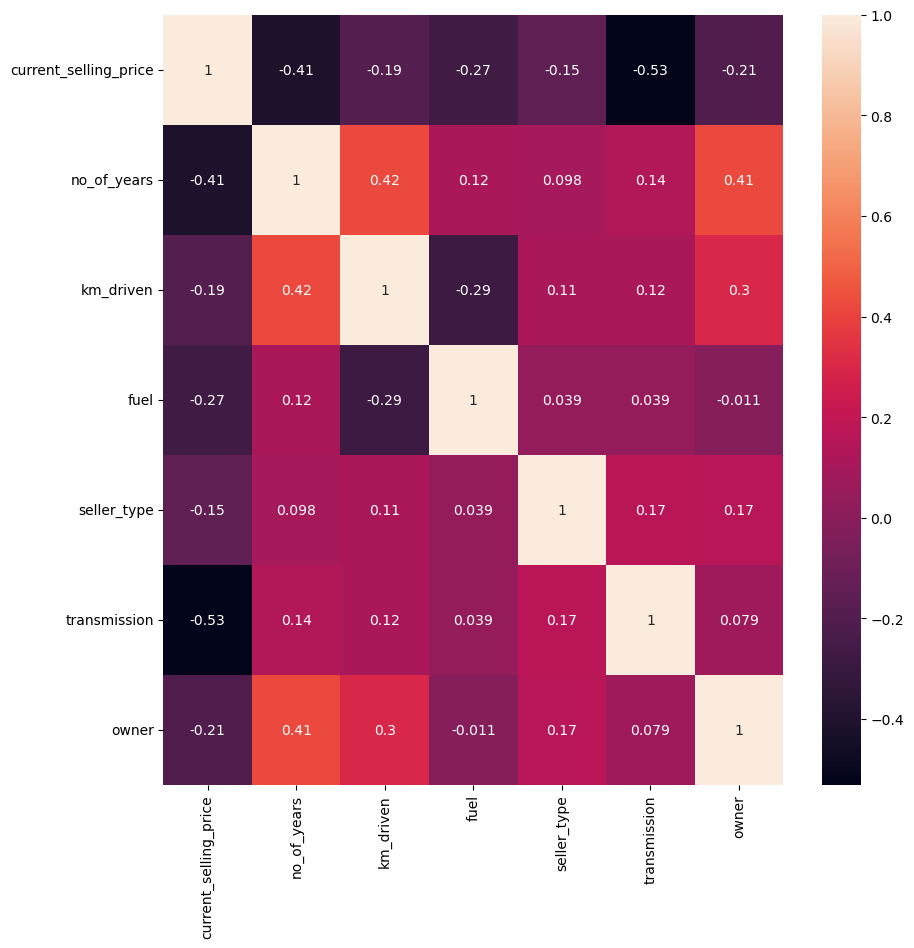

In [19]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)
plt.show()

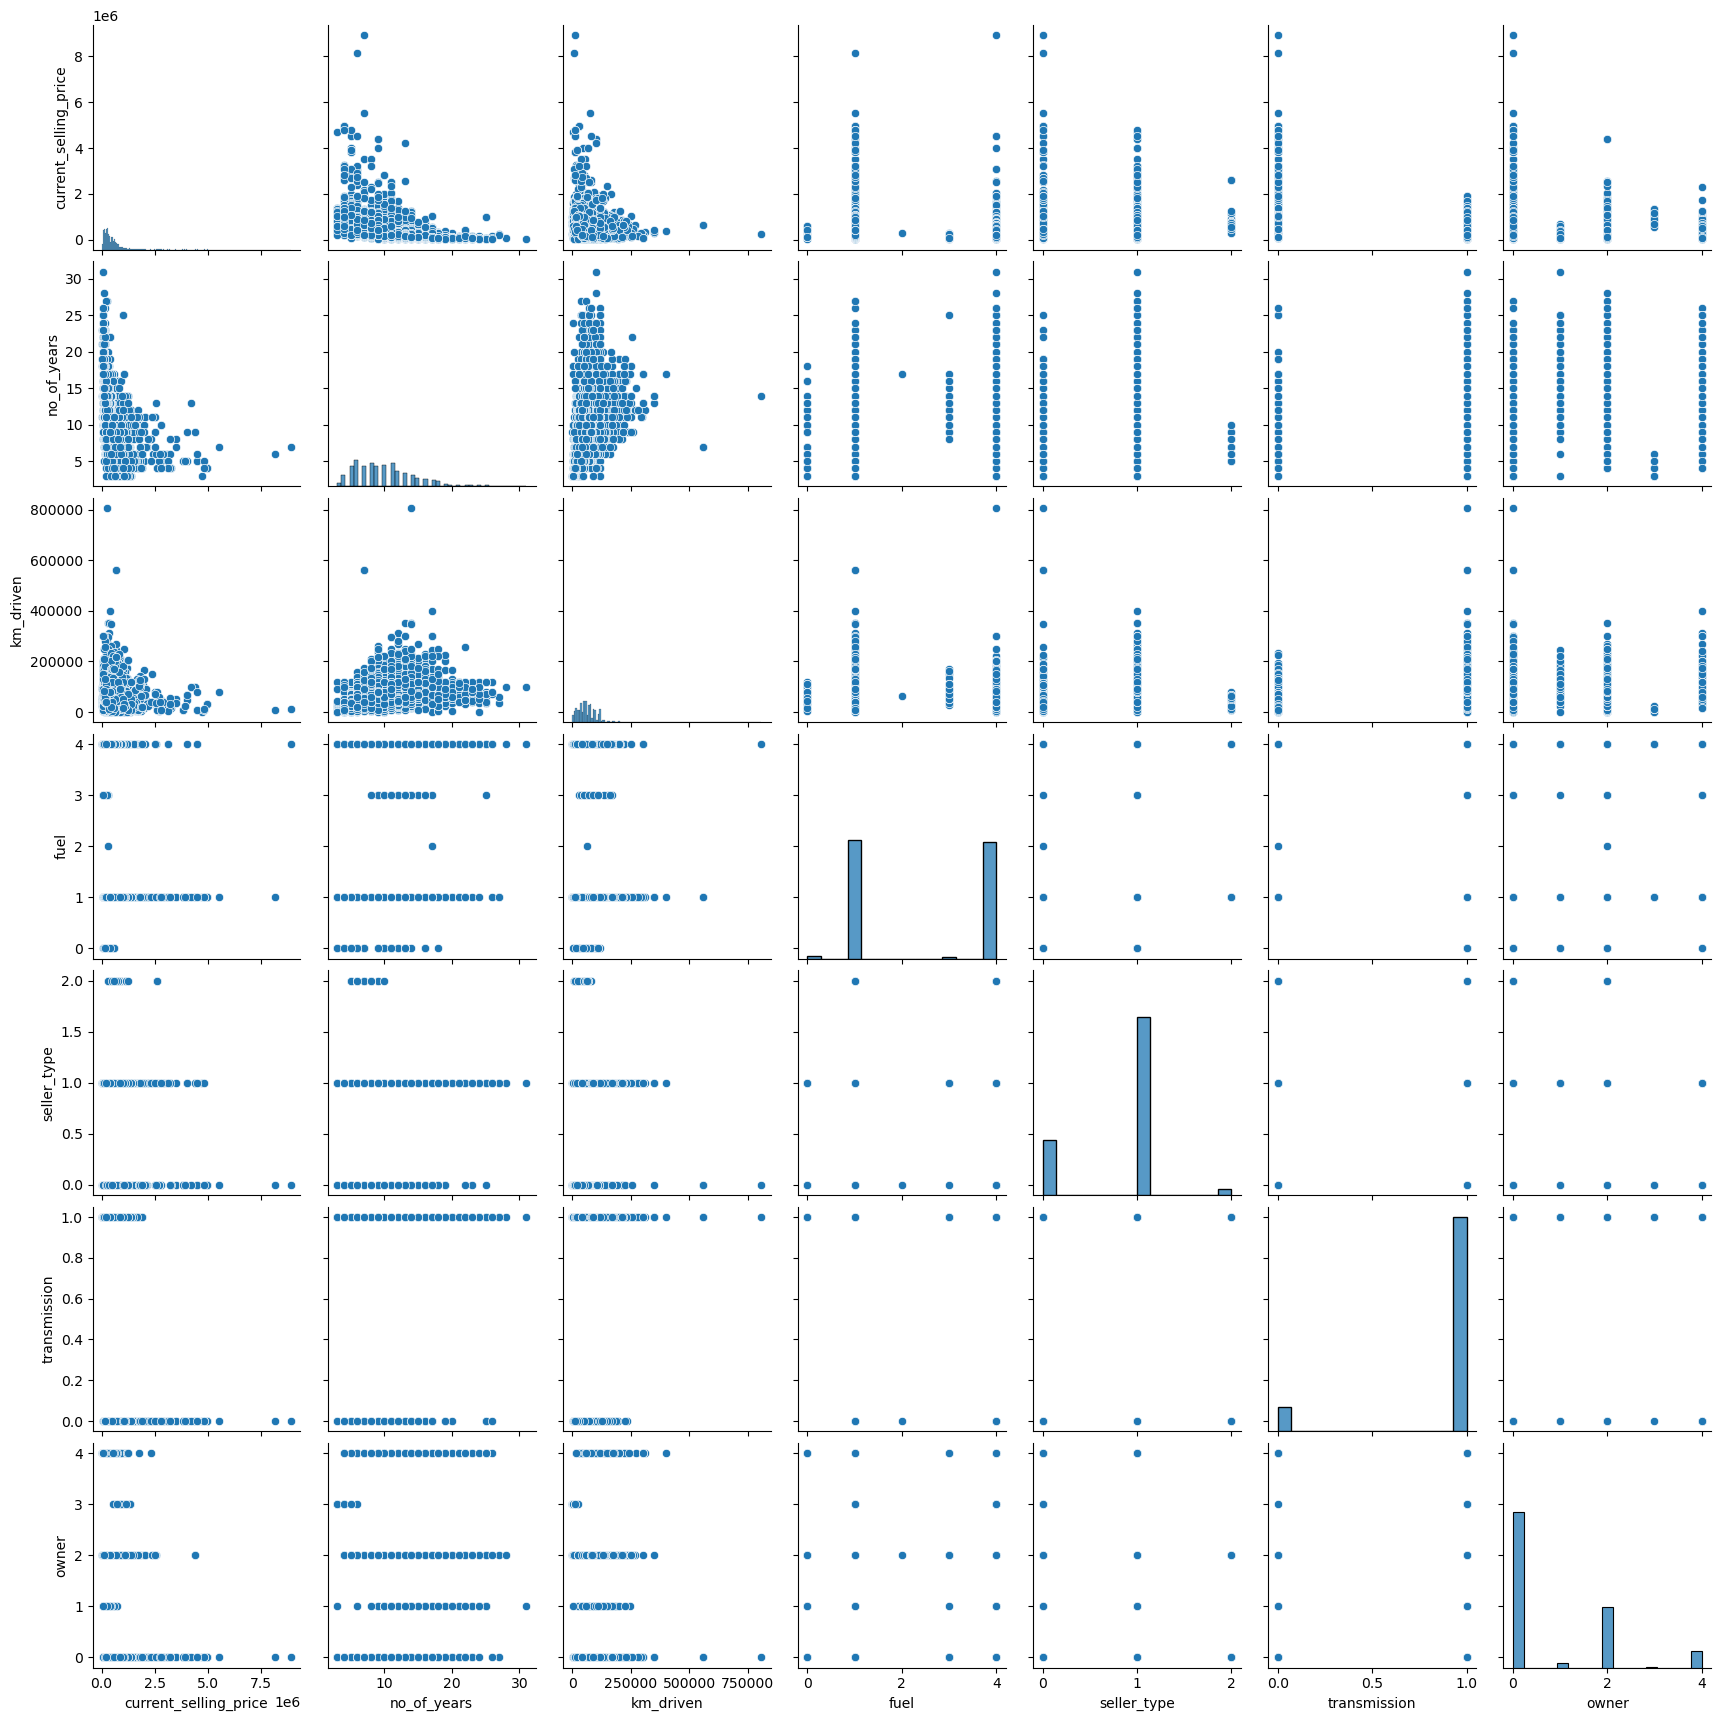

In [20]:
sn.pairplot(df)
plt.show()

# Data Splitting for Training and Testing

In [21]:
x=df.drop("current_selling_price",axis=1)
y=df["current_selling_price"]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model Building

In [23]:
model=DecisionTreeRegressor()

In [24]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

# Model Evaluation

In [25]:
model.score(x_train,y_train)

0.9587298562709905

In [26]:
y_pre=model.predict(x_test)

In [27]:
df2=pd.DataFrame({"predicted_val":y_pre,"actual_val":y_test})

In [28]:
df2.head()

predicted_val  actual_val
548       1150000.0     1150000
2152       260000.0      370000
1274       315000.0      430000
2611       246000.0      250000
593       4950000.0     4950000

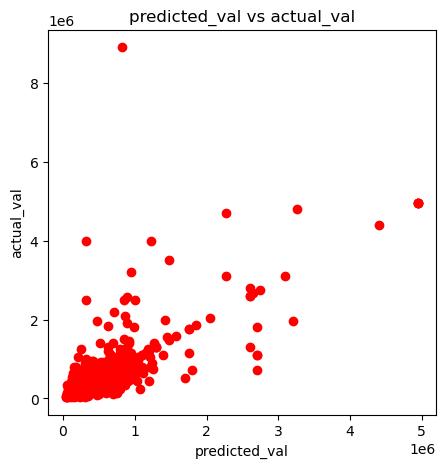

In [29]:
plt.figure(figsize=(5,5))
plt.title("predicted_val vs actual_val")
plt.xlabel("predicted_val")
plt.ylabel("actual_val")
plt.scatter(df2.predicted_val,df2.actual_val,color="r")
plt.show()

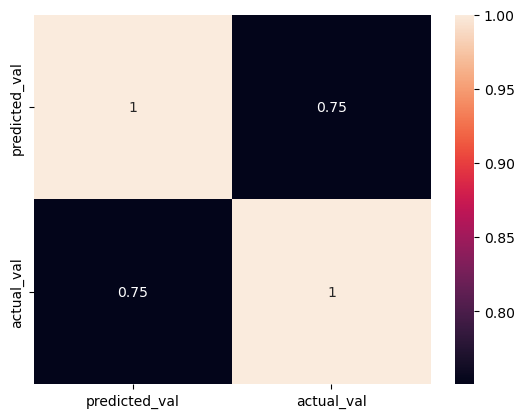

In [30]:
sn.heatmap(df2.corr(),annot=True)
plt.show()

In [31]:
r2_score(y_test,y_pre)

0.5591819002256352

# Hyperparameter Tuning

In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')

In [33]:
print(f'Cross-validation scores: {scores}')
print(f'Mean MSE: {scores.mean()}')
print(f'Standard deviation of MSE: {scores.std()}')


Cross-validation scores: [-1.93952873e+11 -1.97799705e+11 -1.46320771e+11 -1.97058505e+11
 -2.01211404e+11]
Mean MSE: -187268651505.86942
Standard deviation of MSE: 20603651984.391148


In [34]:
params = model.get_params()
params

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [35]:
param_grid={
    
"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
"splitter":["best", "random"],
"min_samples_split":[10,20,50,100,150,200,500,700,850,1000],
"min_samples_leaf":[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000],
'max_depth':[10,50,100,200,None]
}

# Model Building

In [36]:
reg=GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [37]:
reg.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 50, 100, 200, None],
                         'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350,
                                              400, 450, 500, 550, 600, 650, 700,
                                              750, 800, 850, 900, 950, 1000],
                         'min_samples_split': [10, 20, 50, 100, 150, 200, 500,
                                               700, 850, 1000],
                         'splitter': ['best', 'random']})

# Model Evaluation

In [38]:
reg.best_score_

0.5617721598991234

In [39]:
reg.best_params_

{'criterion': 'poisson',
 'max_depth': 100,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'splitter': 'random'}

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.164256 to fit



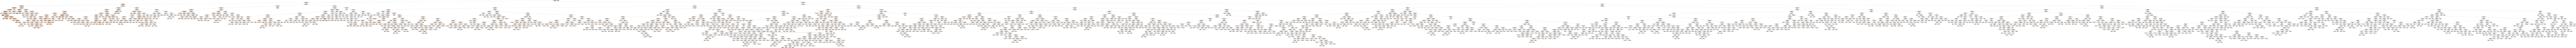

In [40]:
dot_data = export_graphviz(
    model, 
    out_file=None, 
    feature_names=x_train.columns, 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())